<a href="https://colab.research.google.com/github/eduardomtzchenoweth/curso_prepedeutico_CD/blob/main/Analisis_Panda_MtzChenoweth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS DE DATOS UTILIZANDO PANDAS**
### Para este analisis se utilizaron los [datos abiertos](http://www.dgis.salud.gob.mx/contenidos/basesdedatos/Datos_Abiertos_gobmx.html) de la **Secretaria de Salud de Mexico**. Se utilizaron los [registros de urgencias de 2022](http://www.dgis.salud.gob.mx/contenidos/basesdedatos/da_urgencias_gobmx.html).
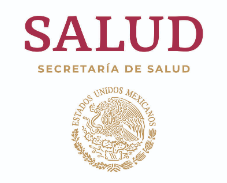
---
Para este conjunto de datos se desea encontrar la relacion entre la hora de ingreso de la urgencia y el motivo de urgencia que es en el estado de Ciudad de Mexico, los motivos de urgencias que existen en este conjunto de datos son:
1. ACCIDENTES, ENVENENAMIENTO Y VIOLENCIA                                     
2. MÉDICA
3. GINECO-OBSTÉTRICA
4. PEDIÁTRICA
5. NO ESPECIFICADO

De los cuales se omitira el no especificado, por motivo de querer estudiar la relacion del motivo especifico de urgencia con la hora, este dato no arrojaria informacion significativa.

*   **Hipotesis principal**: El motivo de urgencia esta relacionado con la hora de ingreso de la urgencia.

*   **Hipotesis secundaria**: El caso de ACCIDENTES, ENVENENAMIENTO Y VIOLENCIA sera mas comun entre las 20:00 y las 6:00.



---


## *Eduardo Alonso Martinez Chenoweth*



---


Se importan las liberias necesarias para llevar acabo este analisis. Pandas, para el manejo de los datos y matplotlib, para graficar los resultados.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Se obtienen los datos disponibles en la [plataforma](http://www.dgis.salud.gob.mx/contenidos/basesdedatos/da_urgencias_gobmx.html), en este caso se trata de un txt que utiliza como separador el caracter "|"

In [ ]:
df = pd.read_csv("URGENCIAS.txt", sep="|")


<ipython-input-84-3220a77439e9>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("URGENCIAS.txt", sep="|")


Obtenemos la informacion del *Data Frame* generado, contamos con 23 columnas de las cuales nos interesan: `fechaingreso`, para filtar por año de 2022; `hora_ingreso`, para poder agrupar los datos por este parametro y `MOTATE`, que es el motivo de urgencias por el cual tambien se agruparan los datos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4939975 entries, 0 to 4939974
Data columns (total 23 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ID               int64  
 1   CLUES            object 
 2   fechaalta        object 
 3   EDAD             int64  
 4   CVEEDAD          int64  
 5   SEXO             int64  
 6   ENTRESIDENCIA    int64  
 7   MUNRESIDENCIA    int64  
 8   DERHAB           object 
 9   TIPOURGENCIA     int64  
 10  MOTATE           int64  
 11  TIPOCAMA         int64  
 12  ENVIADOA         int64  
 13  MP               int64  
 14  AFECPRIN         object 
 15  IRA              float64
 16  PLANEDA          object 
 17  SOBRESEDA        float64
 18  fechaingreso     object 
 19  HORASESTANCIA    object 
 20  MES_ESTADISTICO  float64
 21  hora_ingreso     object 
 22  hora_alta        object 
dtypes: float64(3), int64(11), object(9)
memory usage: 866.8+ MB


Deplegamos una vista general de los datos.

In [ ]:
df.head()

,ID,CLUES,fechaalta,EDAD,CVEEDAD,SEXO,ENTRESIDENCIA,MUNRESIDENCIA,DERHAB,TIPOURGENCIA,...,MP,AFECPRIN,IRA,PLANEDA,SOBRESEDA,fechaingreso,HORASESTANCIA,MES_ESTADISTICO,hora_ingreso,hora_alta
0,1,TSSSA003732,2022-10-25,7,5,1,28,22,11,2,...,8,A099,8.0,8,NaN,2022-10-25,000:13,10.0,13:37,13:50
1,2,ZSSSA013172,2022-11-08,22,5,2,0,999,0,1,...,8,R101,8.0,8,NaN,2022-11-07,012:40,11.0,19:40,08:20
2,3,ZSSSA001016,2022-11-05,10,4,2,32,36,0,1,...,8,J029,2.0,8,NaN,2022-11-05,000:15,11.0,15:15,15:30
3,4,ZSSSA000695,2022-10-26,17,5,1,32,22,0,2,...,8,S602,8.0,8,NaN,2022-10-26,000:54,10.0,10:30,11:24
4,5,ZSSSA000572,2022-11-02,18,5,2,32,19,11,2,...,8,Z349,8.0,8,NaN,2022-11-02,000:29,11.0,06:41,07:10


Primero, seteamos la variable `fechaingreso` como index para manegar los datos de una manera mas comoda a la hora de filtrarlos.

In [ ]:
df['fechaingreso'] = pd.to_datetime(df['fechaingreso'])
df.set_index('fechaingreso', inplace = True)
df

,ID,CLUES,fechaalta,EDAD,CVEEDAD,SEXO,ENTRESIDENCIA,MUNRESIDENCIA,DERHAB,TIPOURGENCIA,...,ENVIADOA,MP,AFECPRIN,IRA,PLANEDA,SOBRESEDA,HORASESTANCIA,MES_ESTADISTICO,hora_ingreso,hora_alta
fechaingreso,,,,,,,,,,,,,,,,,,,,,
2022-10-25,1,TSSSA003732,2022-10-25,7,5,1,28,22,11,2,...,4,8,A099,8.0,8,NaN,000:13,10.0,13:37,13:50
2022-11-07,2,ZSSSA013172,2022-11-08,22,5,2,0,999,0,1,...,2,8,R101,8.0,8,NaN,012:40,11.0,19:40,08:20
2022-11-05,3,ZSSSA001016,2022-11-05,10,4,2,32,36,0,1,...,4,8,J029,2.0,8,NaN,000:15,11.0,15:15,15:30
2022-10-26,4,ZSSSA000695,2022-10-26,17,5,1,32,22,0,2,...,4,8,S602,8.0,8,NaN,000:54,10.0,10:30,11:24
2022-11-02,5,ZSSSA000572,2022-11-02,18,5,2,32,19,11,2,...,4,8,Z349,8.0,8,NaN,000:29,11.0,06:41,07:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04,4939971,GTSSA016842,2022-12-04,17,5,2,11,35,0,1,...,4,8,Z349,8.0,8,NaN,000:07,12.0,17:38,17:45
2022-12-29,4939972,GTSSA017390,2022-12-29,31,5,2,11,8,0,2,...,4,8,M624,8.0,8,NaN,000:55,12.0,18:05,19:00
2022-12-14,4939973,GTSSA016842,2022-12-14,30,5,2,11,35,0,1,...,1,8,O809,8.0,8,NaN,004:40,12.0,02:35,07:15


Se filtran los datos para trabajar unicamente con los datos del año 2022 y los del estado de la CDMX (Originalmente se tenia pensado trabajar con los datos del estado de Sonora, pero contaba con muy pocas entradas).

In [ ]:
df_cdmx = df.loc[(df.index.year == 2022) & (df['ENTRESIDENCIA'] == 9)]
df_cdmx

,ID,CLUES,fechaalta,EDAD,CVEEDAD,SEXO,ENTRESIDENCIA,MUNRESIDENCIA,DERHAB,TIPOURGENCIA,...,ENVIADOA,MP,AFECPRIN,IRA,PLANEDA,SOBRESEDA,HORASESTANCIA,MES_ESTADISTICO,hora_ingreso,hora_alta
fechaingreso,,,,,,,,,,,,,,,,,,,,,
2022-02-06,186,MCSSA004074,2022-02-06,18,5,2,9,7,0,1,...,4,8,T07X,8.0,8,NaN,000:19,2.0,14:21,14:40
2022-02-06,208,MCSSA004074,2022-02-06,54,5,2,9,7,0,1,...,4,8,T07X,8.0,8,NaN,000:15,2.0,17:15,17:30
2022-04-09,711,MCSSA004074,2022-04-09,27,5,2,9,2,0,2,...,4,8,F100,8.0,8,NaN,000:45,4.0,07:00,07:45
2022-02-24,924,MCSSA006780,2022-02-24,45,5,1,9,7,0,1,...,4,8,B029,8.0,8,NaN,000:30,2.0,20:00,20:30
2022-03-11,933,MCSSA001011,2022-03-11,54,5,1,9,13,0,1,...,4,8,T659,8.0,8,NaN,000:25,3.0,23:30,23:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-16,4914271,GTSSA017542,2022-06-16,36,5,2,9,5,0,2,...,4,8,O342,8.0,8,NaN,000:15,6.0,15:30,15:45
2022-12-24,4915277,GTSSA004650,2022-12-24,2,5,1,9,999,0,2,...,4,8,S062,8.0,8,NaN,000:20,12.0,21:20,21:40
2022-12-05,4921383,GTSSA016912,2022-12-05,25,5,1,9,7,0,1,...,4,8,T009,8.0,8,NaN,000:37,12.0,18:23,19:00


Para una facilitar la lectura de los datos cambiamos el nombre de la variable MOTATE, de un valor numero al texto que aparece en el catalogo de datos proporcionado en la misma [pagina](http://www.dgis.salud.gob.mx/contenidos/basesdedatos/da_urgencias_gobmx.html).

In [ ]:
df_cdmx['MOTATE'] = df_cdmx['MOTATE'].replace({1:'ACCIDENTES, ENVENENAMIENTO Y VIOLENCIA',
                                                2: 'MÉDICA',
                                                3: 'GINECO-OBSTÉTRICA',
                                                4: 'PEDIÁTRICA',
                                                9: 'NO ESPECIFICADO'})
df_cdmx['MOTATE']

<ipython-input-142-261daffe7ba6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cdmx['MOTATE'] = df_cdmx['MOTATE'].replace({1:'ACCIDENTES, ENVENENAMIENTO Y VIOLENCIA',


fechaingreso
2022-02-06    ACCIDENTES, ENVENENAMIENTO Y VIOLENCIA
2022-02-06                                    MÉDICA
2022-04-09                                    MÉDICA
2022-02-24                                    MÉDICA
2022-03-11                                    MÉDICA
                               ...                  
2022-06-16                         GINECO-OBSTÉTRICA
2022-12-24    ACCIDENTES, ENVENENAMIENTO Y VIOLENCIA
2022-12-05                                    MÉDICA
2022-12-27    ACCIDENTES, ENVENENAMIENTO Y VIOLENCIA
2022-12-29    ACCIDENTES, ENVENENAMIENTO Y VIOLENCIA
Name: MOTATE, Length: 7024, dtype: object

Agregamos una nueva colunma llamada `hora_formateada` la cual se obtiene de la columna `hora_ingreso` pero con un formateo para que unicamente tome en cuenta la hora sin los minutos, de esta manera sera mucho mas facil agrupar los datos en grupos mas grandes y observar el comportamiento de los datos por rango de horas.

In [ ]:
df_cdmx['hora_ingreso'] = pd.to_datetime(df_cdmx['hora_ingreso'], format='%H:%M', errors='coerce')
df_cdmx['hora_formateada'] = df_cdmx['hora_ingreso'].dt.floor('H')
df_cdmx['hora_formateada'] = df_cdmx['hora_formateada'].dt.strftime('%H:%M')

Después de la conversión a datetime:


<ipython-input-143-f1c424a880c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cdmx['hora_ingreso'] = pd.to_datetime(df_cdmx['hora_ingreso'], format='%H:%M', errors='coerce')
<ipython-input-143-f1c424a880c6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cdmx['hora_formateada'] = df_cdmx['hora_ingreso'].dt.floor('H')
<ipython-input-143-f1c424a880c6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

Realizamos la agrupacion, primeramente por hora, despues por motivo de urgencia y por ultimo la cantidad de las entradas que existen de ese motivo en la hora del intervalo.

In [ ]:
df_cdmx_group =df_cdmx.groupby(['hora_formateada','MOTATE'])[['MOTATE']].count()
df_cdmx_group = df_cdmx_group.rename(columns={'MOTATE': 'cantidad'})
df_cdmx_group

cantidad
hora_formateada MOTATE                                          
00:00           ACCIDENTES, ENVENENAMIENTO Y VIOLENCIA        18
                GINECO-OBSTÉTRICA                             39
                MÉDICA                                       141
                NO ESPECIFICADO                                2
                PEDIÁTRICA                                     9
...                                                          ...
22:00           PEDIÁTRICA                                    15
23:00           ACCIDENTES, ENVENENAMIENTO Y VIOLENCIA        46
                GINECO-OBSTÉTRICA                             65
                MÉDICA                                       144
                PEDIÁTRICA                                    17

[100 rows x 1 columns]

De la columna `hora_formateada` se obtiene cada hora unica y se guardara en un arreglo. Esto se hace por la naturaleza de la practica, con el fin de utilizar la funcion `unique`, perfectamente se podria generar un array utilizando `numphy` con las horas, de cualquier manera este metodo tambien es valido.

In [ ]:
horas_unicas = df_cdmx['hora_formateada'].unique()
horas_unicas.sort()
horas_unicas

array(['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00',
       '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
       '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00',
       '21:00', '22:00', '23:00'], dtype=object)

Guardamos en variables separadas los datos agrupados por horas pero separando el motivo de urgencia en cada una de las variable.

In [ ]:
accidentes = df_cdmx_group.loc[df_cdmx_group.index.get_level_values('MOTATE') == 'ACCIDENTES, ENVENENAMIENTO Y VIOLENCIA']['cantidad']
gineco = df_cdmx_group.loc[df_cdmx_group.index.get_level_values('MOTATE') == 'GINECO-OBSTÉTRICA']['cantidad']
medica = df_cdmx_group.loc[df_cdmx_group.index.get_level_values('MOTATE') == 'MÉDICA']['cantidad']
pediatrica = df_cdmx_group.loc[df_cdmx_group.index.get_level_values('MOTATE') == 'PEDIÁTRICA']['cantidad']


Graficamos los datos, cada linea representa un motivo de urgencia, en el eje x es la hora a la que se presenta la urgencia, en el eje y la cantidad de urgencias.

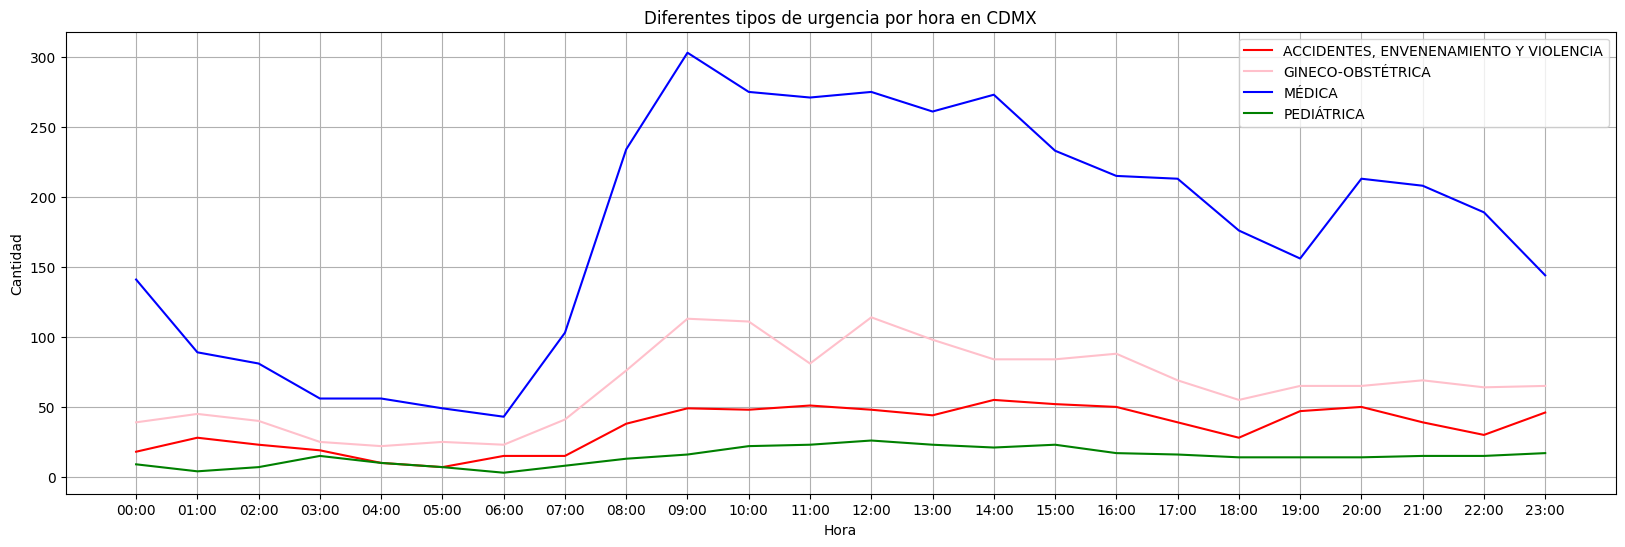

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(horas_unicas, accidentes, label="ACCIDENTES, ENVENENAMIENTO Y VIOLENCIA", color='red')
plt.plot(horas_unicas, gineco, label="GINECO-OBSTÉTRICA", color='pink')
plt.plot(horas_unicas, medica, label="MÉDICA", color='blue')
plt.plot(horas_unicas, pediatrica, label="PEDIÁTRICA", color='green')

plt.title('Diferentes motivos de urgencia por hora en CDMX')
plt.xlabel('Hora')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)

plt.show()

## Analisis de los datos:
Podemos observar que la hipotesis principal de "El motivo de urgencia esta relacionado con la hora de ingreso de la urgencia." es parcialmente cierta. En efecto, esta hipotesis se ve respaldad por el pico que tiene las urgencias **medicas** a apartir de las 6:00, se observa un gran cambio apartir de esa hora en la grafica. Tambien observamos un cambio, aunque un menor, en el caso de las urgencias de motivo **gineco-obstetrica**, teniendo un crecimiento alrededor de la misma hora que las urgencias **medicas**.

Por otra parte la hipotesis secundaria de "El caso de ACCIDENTES, ENVENENAMIENTO Y VIOLENCIA sera mas comun entre las 20:00 y las 6:00." puede ser rechazada ya que no se no observa un cambio significativo entre las horas supuestas en la propuestas.

---

De este analisis podemos concluir que, en efecto existe una relacion entre la hora de ingreso y el motivo de urgencia, cumpliendose para el caso de que el la urgencia sea del motivo **medica** o **gineco-obstetrica**. Esta informacion podria ser util para poder preparar a los centros de atencion medica con el equipo necesario para atender este motivo de urgencias con mayor eficiencia.

Para conocer los motivos por los cuales estos son los motivos con una mayor relacion con la hora se necesitaria realizar un analizis mas profundo y comparar otro motivo de variables que por cuestiones de tiempo se dejaran para otro momento, pero se planetara la hipotesis sobre esa icognita: "Los pacientes de CDMX con urgencias de motivo **medica** o **gineco-obstetrica** son mas frecuentes a las 6:00 por motivos de que despiertan por las mañanas con malestares"